In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-dataset/emotion-dataset.csv


In [2]:
# import gensim.utils as g_utils
import re
from nltk.tokenize.treebank import TreebankWordDetokenizer
import gensim.utils as gutils

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/emotion-dataset/emotion-dataset.csv')

In [4]:
df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
df.describe()

,text,emotion
count,18000,18000
unique,17958,6
top,i was so stubborn and that it took you getting...,joy
freq,2,6057


In [6]:
def preprocess(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [7]:
def sent_2_words(sentences):
    for sentence in sentences:
        yield(gutils.simple_preprocess(str(sentence),deacc=True))

In [8]:
def de_tokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [9]:
from sklearn.preprocessing import LabelEncoder


df['emotion_label'] = LabelEncoder().fit_transform(df['emotion'])

In [10]:
df.head()

,text,emotion,emotion_label
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,3
4,i am feeling grouchy,anger,0


<Axes: xlabel='emotion'>

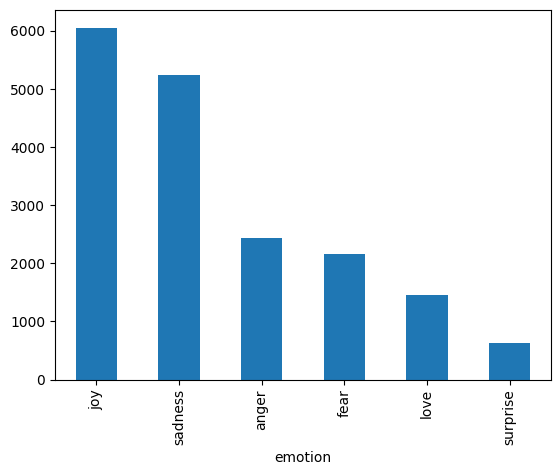

In [11]:
df['emotion'].value_counts().plot(kind='bar')

<Axes: xlabel='emotion_label'>

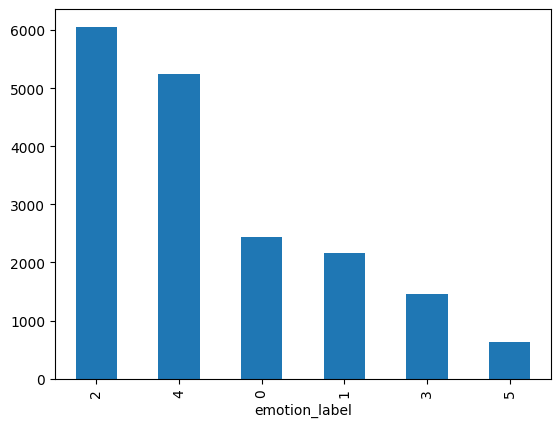

In [12]:
df['emotion_label'].value_counts().plot(kind='bar')

In [13]:
index = df[df.duplicated() == True].index
df.drop(index, axis = 0, inplace = True)
df.reset_index(inplace=True, drop = True)

In [14]:
df[df['text'].duplicated() == True]

,text,emotion,emotion_label
5067,i feel on the verge of tears from weariness i ...,joy,2
6133,i still feel a craving for sweet food,love,3
6563,i tend to stop breathing when i m feeling stre...,anger,0
7623,i was intensely conscious of how much cash i h...,sadness,4
7685,im still not sure why reilly feels the need to...,surprise,5
8246,i am not amazing or great at photography but i...,love,3
9596,ive also made it with both sugar measurements ...,joy,2
9687,i had to choose the sleek and smoother feel of...,joy,2
9769,i often find myself feeling assaulted by a mul...,sadness,4
9786,i feel im being generous with that statement,joy,2


In [15]:
index = df[df['text'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)
df.reset_index(inplace=True, drop = True)

In [16]:
df[df['text'].duplicated() == True]

,text,emotion,emotion_label


In [ ]:
len(df)

In [ ]:
X_train = np.array(df['text'].values.tolist()[:15000])
X_test = np.array(df['text'].values.tolist()[15000:])
y_train = np.array(df['emotion'].values.tolist()[:15000])
y_test = np.array(df['emotion'].values.tolist()[15000:])

In [ ]:
len(X_train) == len(y_train)

In [ ]:
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def train_model(model, data, targets):
    # Create a Pipeline object with a TfidfVectorizer and the given model
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    # Fit the model on the data and targets
    text_clf.fit(data, targets)
    return text_clf

In [ ]:
#Train the model with the training data
log_reg = train_model(LogisticRegression(solver='liblinear',random_state = 0), X_train, y_train)

In [ ]:
#test the model with the test data
y_pred=log_reg.predict(X_test)

#calculate the accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', log_reg_accuracy,'\n')

f1score = f1_score(y_test,y_pred, average=None)
pd.DataFrame(f1score, index=df.emotion.unique(), columns=['F1 Scores'])

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
#Train the model with the training data
dec_tree = train_model(DecisionTreeClassifier(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=dec_tree.predict(X_test)

#calculate the accuracy
DTC_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', DTC_accuracy,'\n')

f1score = f1_score(y_test,y_pred, average=None)
pd.DataFrame(f1score, index=df.emotion.unique(), columns=['F1 Scores'])

print(classification_report(y_test, y_pred))

In [ ]:
#Train the model with the training data
SVM = train_model(SVC(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=SVM.predict(X_test)

#calculate the accuracy
SVM_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', SVM_accuracy,'\n')

f1score = f1_score(y_test,y_pred, average=None)
pd.DataFrame(f1score, index=df.emotion.unique(), columns=['F1 Scores'])

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Support Vector Machine'],
    'Accuracy': [log_reg_accuracy.round(2), DTC_accuracy.round(2), SVM_accuracy.round(2)]})

models.sort_values(by='Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

In [ ]:
import seaborn as sns
import nltk
#Lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from lime.lime_text import IndexedString,IndexedCharacters
from lime.lime_base import LimeBase
from lime.lime_text import explanation
sns.set(font_scale=1.3)
nltk.download('omw-1.4')

In [ ]:
df.emotion.unique()

In [ ]:
dec_tree.classes_

In [ ]:
X_test[15]

In [ ]:
np.array(df['emotion'].values.tolist()[15015])

In [ ]:
#c_LR = make_pipeline(tfidf, clf)
explainer_LR = LimeTextExplainer(class_names=dec_tree.classes_)
idx  = 15
print("Actual Text : ", X_test[idx])
print("Prediction : ", dec_tree.predict(X_test)[idx])
print("Actual :     ", y_test[idx])
exp = explainer_LR.explain_instance(X_test[idx], dec_tree.predict_proba,top_labels=5)
exp.show_in_notebook()

In [ ]:
#c_LR = make_pipeline(tfidf, clf)
explainer_LR = LimeTextExplainer(class_names=dec_tree.classes_)
idx  = 56
print("Actual Text : ", X_test[idx])
print("Prediction : ", dec_tree.predict(X_test)[idx])
print("Actual :     ", y_test[idx])
exp = explainer_LR.explain_instance(X_test[idx], dec_tree.predict_proba,top_labels=5)
exp.show_in_notebook()

In [ ]:
custom_x = np.array(['i am not sad, but happy, yes not very sad'])
#c_LR = make_pipeline(tfidf, clf)
explainer_LR = LimeTextExplainer(class_names=dec_tree.classes_)
idx  = 56
print("Actual Text : ", custom_x)
print("Prediction : ", dec_tree.predict(custom_x)[0])
print("Actual :     ", 'joy')
exp = explainer_LR.explain_instance(custom_x[0], dec_tree.predict_proba,top_labels=5)
exp.show_in_notebook()

In [ ]:
custom_x = np.array(['i am not happy, but sad, yes not very happy'])
#c_LR = make_pipeline(tfidf, clf)
explainer_LR = LimeTextExplainer(class_names=dec_tree.classes_)
idx  = 56
print("Actual Text : ", custom_x)
print("Prediction : ", dec_tree.predict(custom_x)[0])
print("Actual :     ", 'sadness')
exp = explainer_LR.explain_instance(custom_x[0], dec_tree.predict_proba,top_labels=5)
exp.show_in_notebook()

In [ ]:
#c_LR = make_pipeline(tfidf, clf)
explainer_LR = LimeTextExplainer(class_names=dec_tree.classes_)
idx  = 157
print("Actual Text : ", X_test[idx])
print("Prediction : ", dec_tree.predict(X_test)[idx])
print("Actual :     ", y_test[idx])
exp = explainer_LR.explain_instance(X_test[idx], dec_tree.predict_proba,top_labels=5)
exp.show_in_notebook()

In [17]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

In [18]:
temp = []
#Splitting pd.Series to list
data_to_list = df['text'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(preprocess(data_to_list[i]))
data_words = list(sent_2_words(temp))
data = []
for i in range(len(data_words)):
    data.append(de_tokenize(data_words[i]))
print(data[:5])

['didnt feel humiliated', 'can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing minute to post feel greedy wrong', 'am ever feeling nostalgic about the fireplace will know that it is still on the property', 'am feeling grouchy']


In [19]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import regularizers

max_words = 5000
max_len = max([len(t) for t in data])

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
msgs = pad_sequences(sequences, maxlen=max_len)
print(msgs)

[[   0    0    0 ...  133    1  637]
 [   0    0    0 ...    2   19 1333]
 [   0    0    0 ...    1  457  407]
 ...
 [   0    0    0 ...    5    7 3267]
 [   0    0    0 ...   46    8 2490]
 [   0    0    0 ...  297    3  297]]


In [20]:
X_train = np.array(msgs[:15000])
X_test = np.array(msgs[15000:])
y_train = np.array(df['emotion_label'].values.tolist()[:15000])
y_test = np.array(df['emotion_label'].values.tolist()[15000:])

In [ ]:
df.head()

In [21]:
vocabSize = len(tokenizer.index_word) + 1

In [22]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-11-16 05:56:09--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-16 05:56:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-16 05:56:09--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [23]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [24]:
# Read GloVE embeddings
path_to_glove_file = '/kaggle/working/glove.6B.200d.txt'
num_tokens = vocabSize
embedding_dim = 200 #latent factors or features  
hits = 0
misses = 0
embeddings_index = {}

In [25]:
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))


# Assign word vectors to our dictionary/vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Found 400000 word vectors.
Converted 15028 words (1079 misses)


In [26]:
X_train.shape

(15000, 294)

In [28]:
# Build neural network architecture

adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.3,recurrent_dropout=0.3, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.5,recurrent_dropout=0.5)))
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 294, 200)          3221600   
                                                                 
 bidirectional_3 (Bidirectio  (None, 294, 512)         935936    
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 294, 256)         656384    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                      

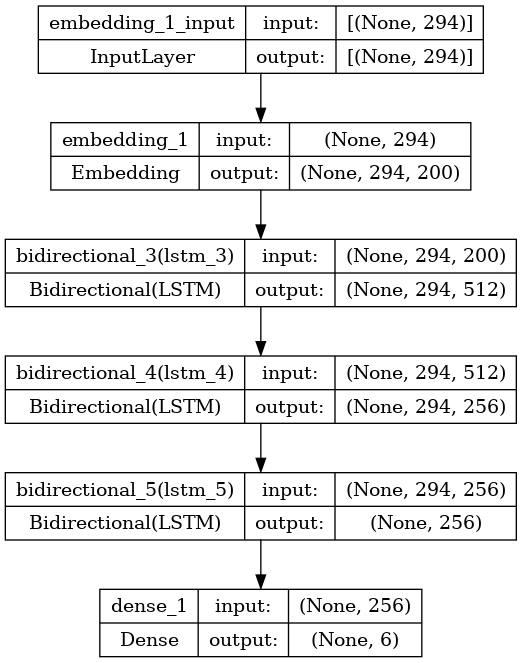

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

In [30]:
#to stop the training when the loss starts to increase
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

In [ ]:
# Fit model
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    batch_size=256,
                    epochs=30,
                    callbacks=[callback]
                   )

Epoch 1/30
59/59 [==============================] - 369s 6s/step - loss: 1.5200 - accuracy: 0.3955 - val_loss: 1.4135 - val_accuracy: 0.4496
Epoch 2/30
59/59 [==============================] - 355s 6s/step - loss: 1.2963 - accuracy: 0.5066 - val_loss: 1.2716 - val_accuracy: 0.5135
Epoch 3/30
59/59 [==============================] - 355s 6s/step - loss: 1.1136 - accuracy: 0.5803 - val_loss: 0.9200 - val_accuracy: 0.6734
Epoch 4/30
59/59 [==============================] - 354s 6s/step - loss: 0.9440 - accuracy: 0.6523 - val_loss: 0.9190 - val_accuracy: 0.6717
Epoch 5/30
37/59 [=================>............] - ETA: 2:10 - loss: 0.8057 - accuracy: 0.7020